## Google Advanced Analytic Professional Certificate Capstone

### Introduction

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.

For this deliverable, I will choose a method to approach this data challenge , selecting either a regression model or a machine learning model to predict whether an employee will leave the company.

The primary objective of this project is to create a model that predicts employee attrition. The successful implementation of this predictive model will equip Salifort Motors with valuable insights, enabling them to make data-driven decisions to retain their workforce. A comprehensive analysis of the HR dataset has been conducted, and data preprocessing, exploratory data analysis, and feature engineering have been carried out to prepare the data for model development.

### import libraries and dataset 

In [75]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [76]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [77]:
data = pd.read_csv(r"./datasource/HR_comma_sep.csv")

In [78]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [79]:
data.shape

(14999, 10)

In [80]:
# Rename columns as needed
data=data.rename(columns={'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident','Department':'department','time_spend_company':'tenure'})
# Display all column names after the update
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Clean dataset

**Check data types for each column**

In [81]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

* Eight variables are numeric and two others are categorical

**Check duplicates**

In [82]:
data[data.duplicated(keep='first')]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [83]:
# Inspect some rows containing duplicates as needed
data.iloc[14994,:]

satisfaction_level           0.4
last_evaluation             0.57
number_project                 2
average_monthly_hours        151
tenure                         3
work_accident                  0
left                           1
promotion_last_5years          0
department               support
salary                       low
Name: 14994, dtype: object

In [84]:
# Drop duplicates and save resulting dataframe in a new variable as needed
data1=data.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Check missing value**

In [85]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


* There is no missing value.

**Check outliers**

In [86]:
data1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [87]:
#function of boxplot 
def boxploter(column_str):
    plt.figure(figsize=(7,3))
    sns.boxplot(x=data1[column_str])
    plt.title(f'{column_str} boxplot');

In [88]:
# function for histogram plot
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(data1[column_str].median(), 1)
    plt.figure(figsize=(10,5))
    ax = sns.histplot(x=data1[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

**tenure**

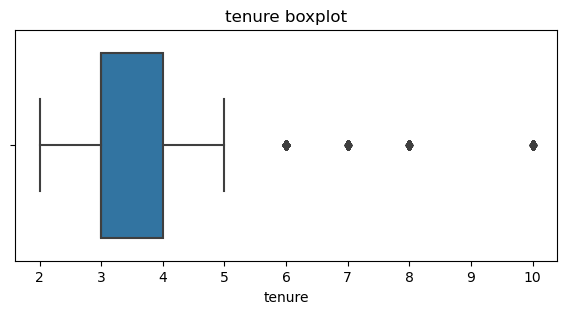

In [89]:
boxploter('tenure')

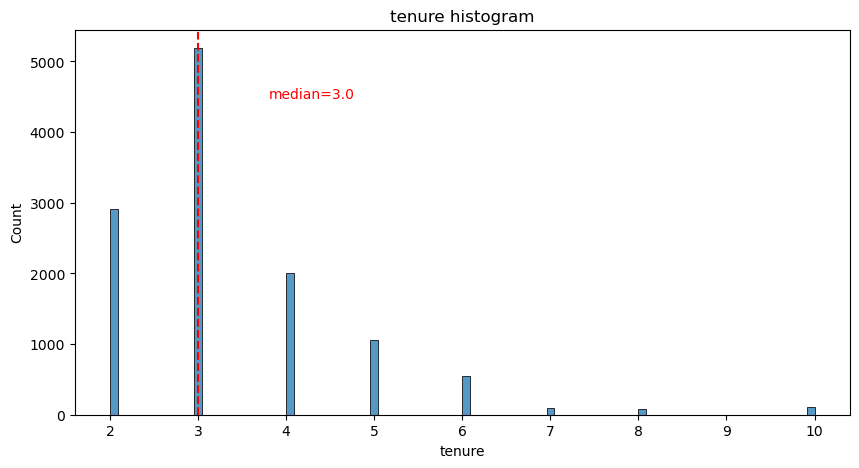

In [90]:
histogrammer('tenure')

* The value nof `tenure` is discrete with the media being 3.
* Value 10 and several others are outliers. 

**average_monthly_hours**

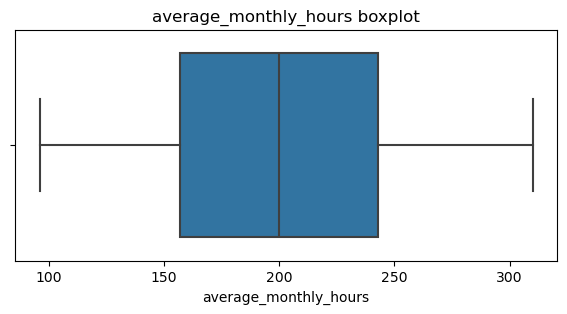

In [91]:
boxploter('average_monthly_hours')

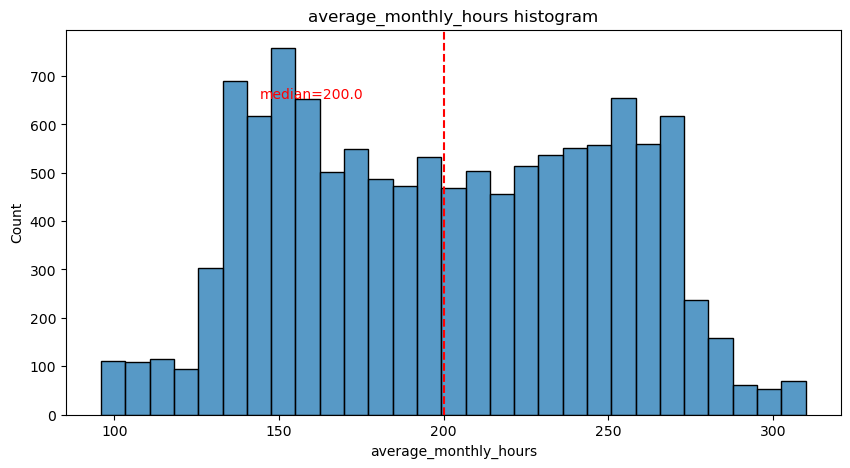

In [92]:
histogrammer('average_monthly_hours')

* No outliers and the distribution is symmetric to the median value.

### impute the outliers 

In [93]:
data['tenure'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

In [94]:
q1=3.000000
q2=3.000000
q3=4.000000
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit =q1-1.5*iqr
print('upper limit:',upper_limit)
print('low limit:',lower_limit)

upper limit: 5.5
low limit: 1.5


In [95]:
# detect the outliers 
data1_denture_outliers=data1[( (data1['tenure']>=5.5) | ( data1['tenure']<= 1.5 ) ) ]
data1_denture_outliers.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


### Correlation between variables

In [96]:
# Get numbers of people who left vs. stayed
data1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [97]:
# Get percentages of people who left vs. stayed
data1['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

* There are about 83.4% of peope stayed while 16.6% people left.

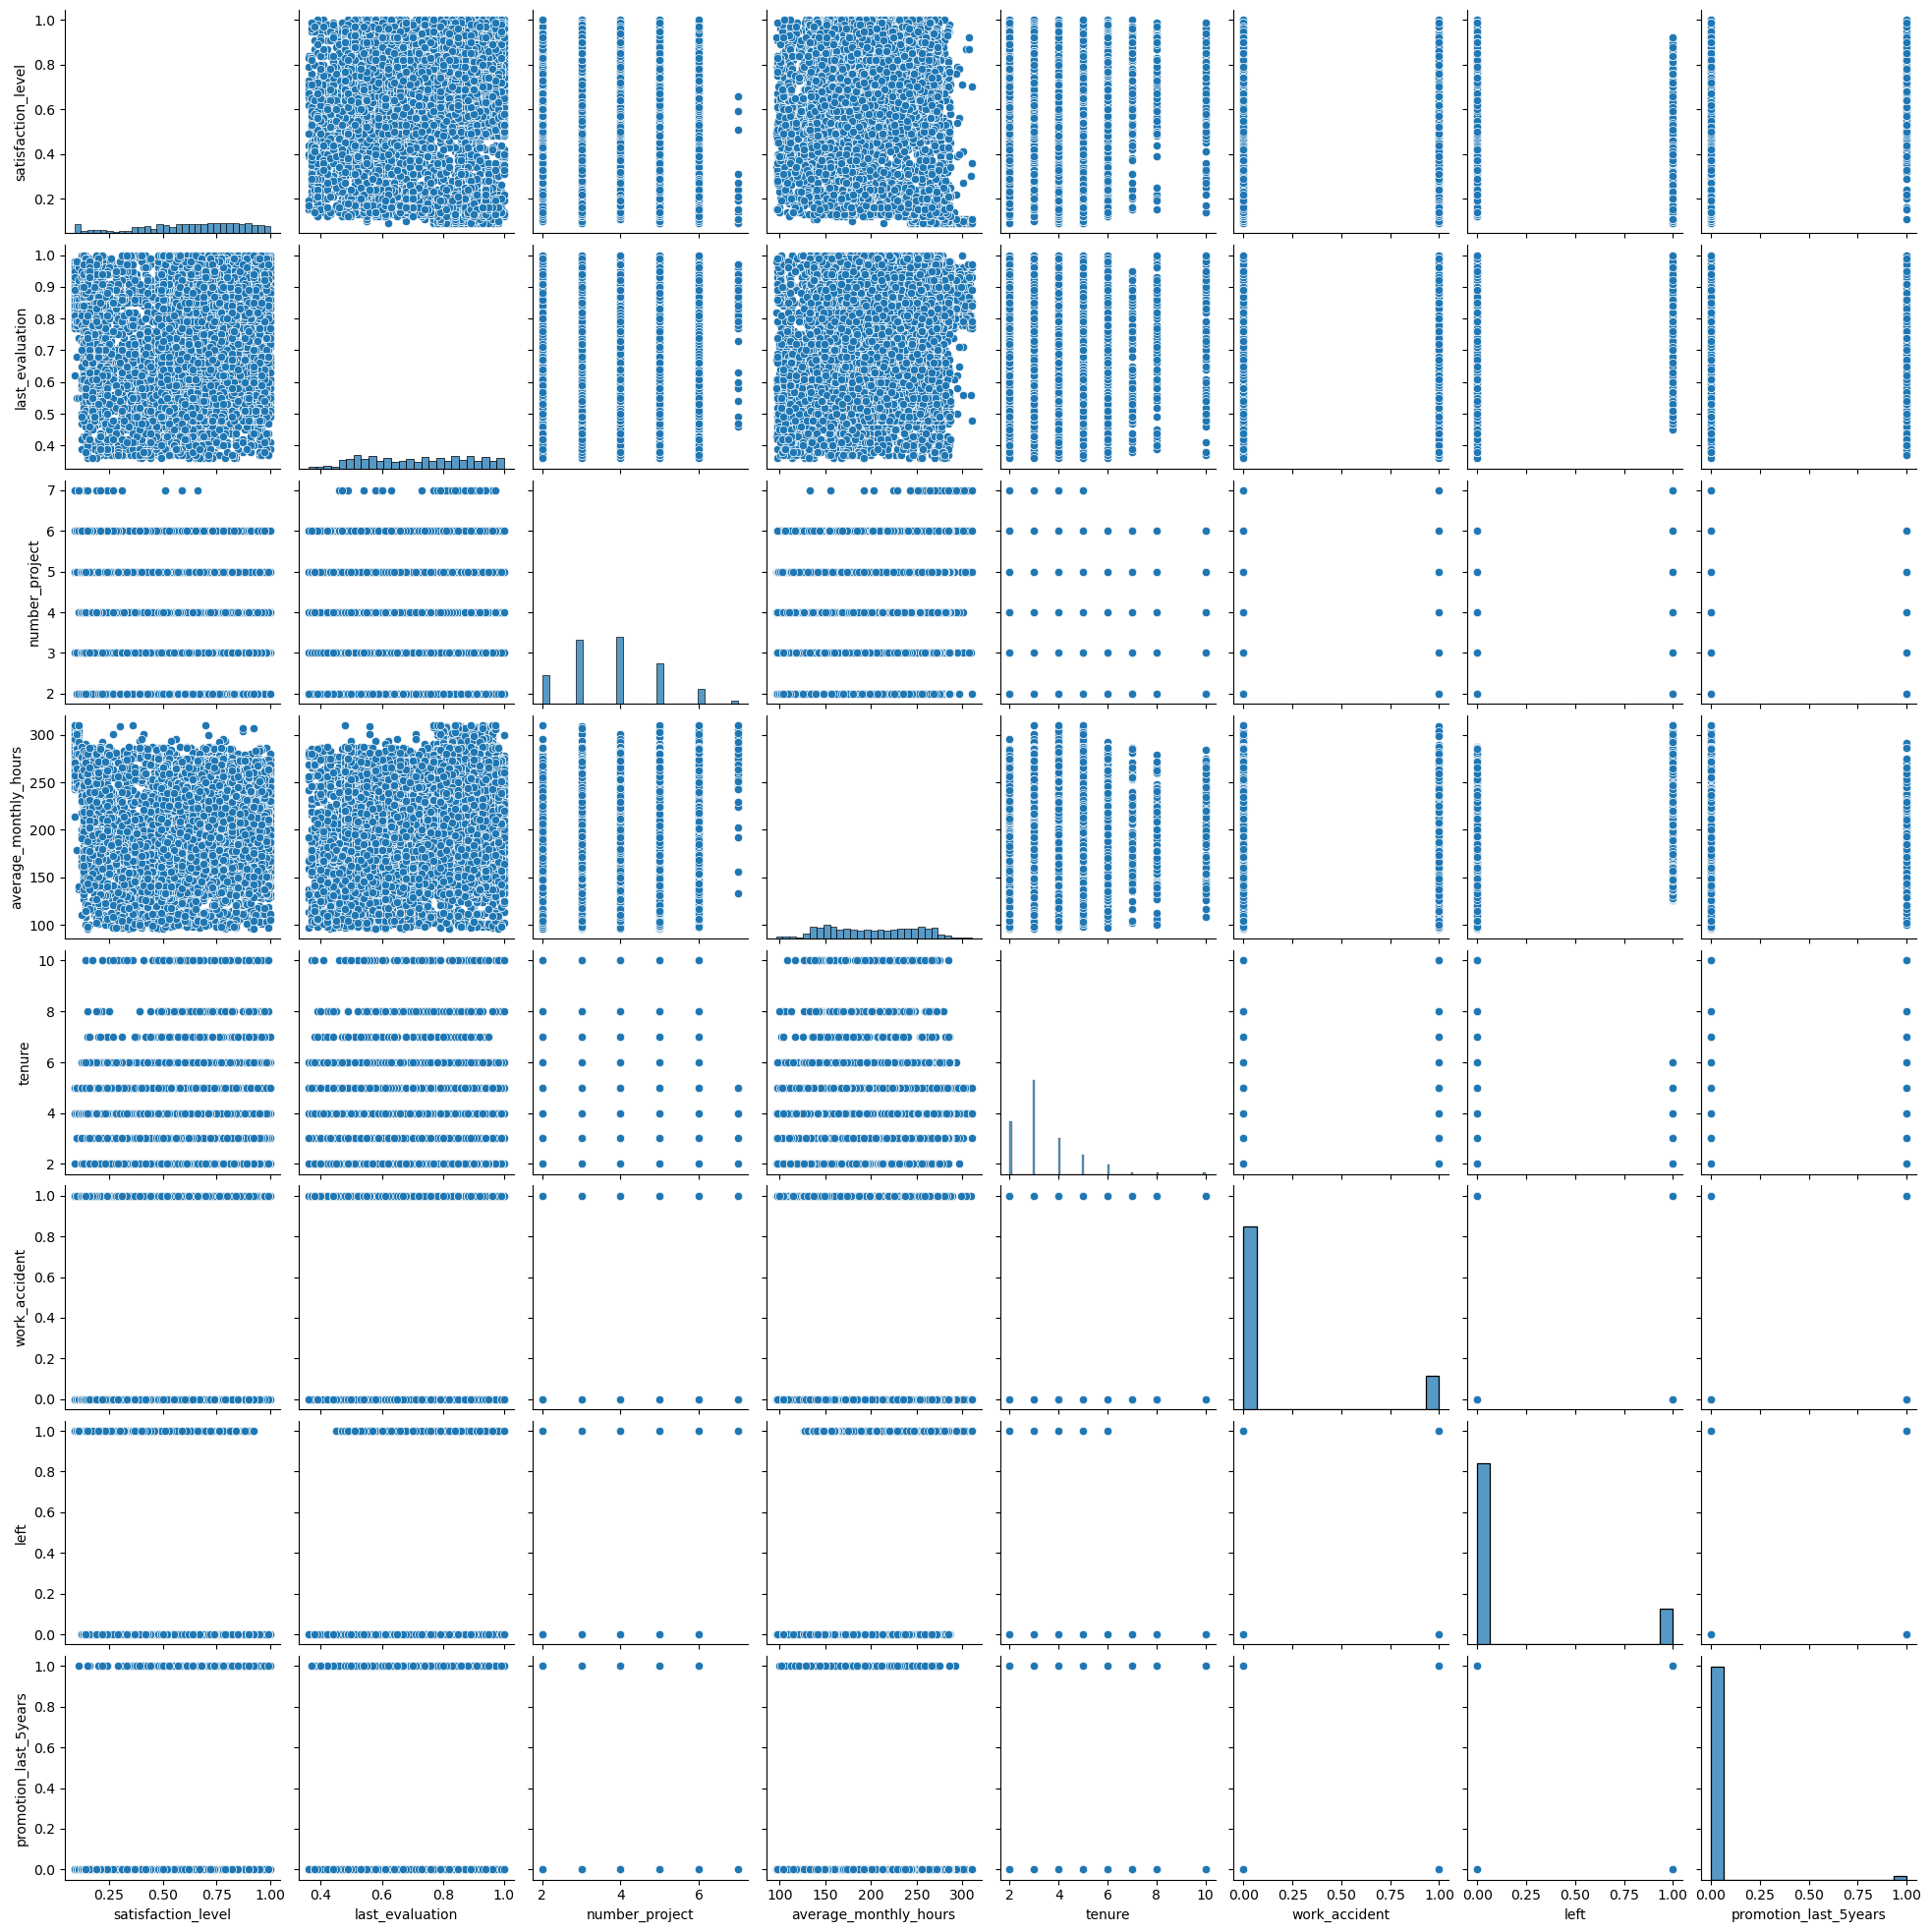

In [98]:
# Create a pair plot to visualize relationships between variables in the data.
sns.pairplot(data1)

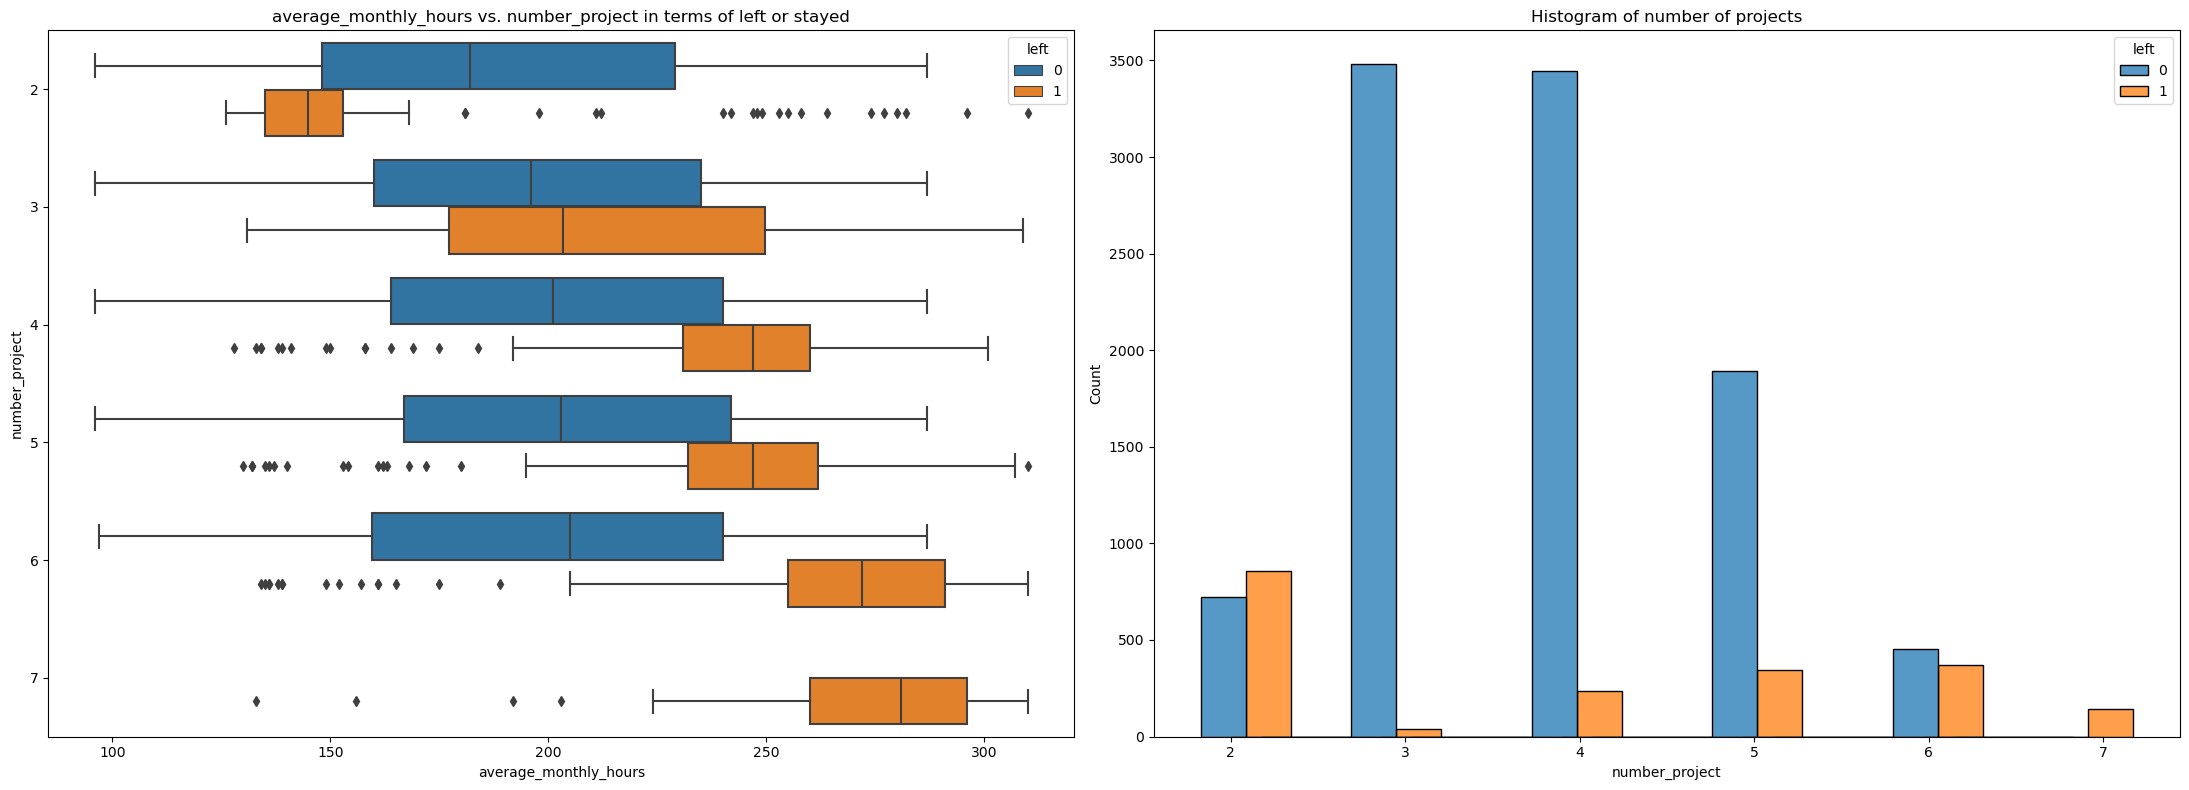

In [99]:
# Create a subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
# Boxplot to visualize the relationship between average_monthly_hours and number_project, grouped by 'left'
sns.boxplot(data=data1, x='average_monthly_hours', y='number_project', ax=axes[0], hue='left', orient='h')
axes[0].set_title('average_monthly_hours vs. number_project in terms of left or stayed')
# Histogram to visualize the distribution of number_project, grouped by 'left'
sns.histplot(data=data1, x='number_project', ax=axes[1], hue='left', multiple='dodge', shrink=3)
axes[1].set_title('Histogram of number of projects')
# Display the plot
plt.tight_layout()
plt.show()

In [100]:
### hist plot to reveal distribution of the data 

<Axes: xlabel='satisfaction_level', ylabel='Count'>

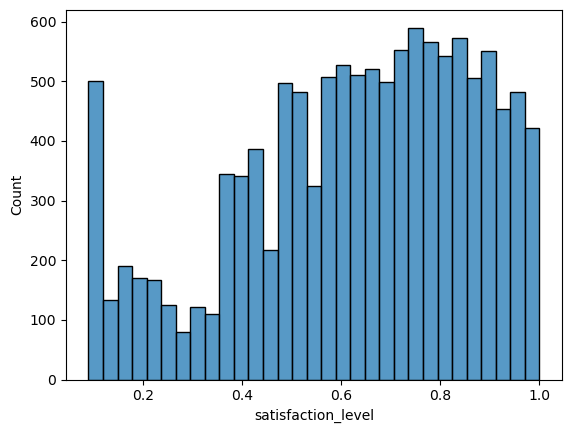

In [101]:
sns.histplot(data=data1,x='satisfaction_level')

<Axes: xlabel='last_evaluation', ylabel='Count'>

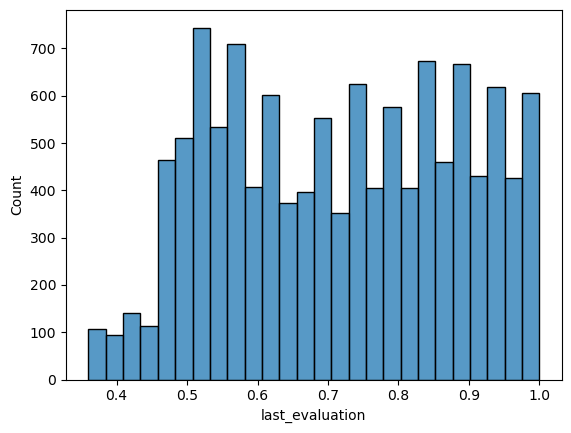

In [102]:
sns.histplot(data=data1,x='last_evaluation')

<Axes: xlabel='number_project', ylabel='Count'>

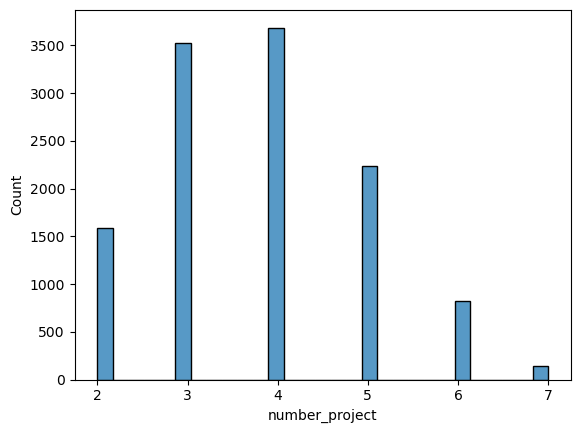

In [103]:
sns.histplot(data=data1,x='number_project')

<Axes: xlabel='average_monthly_hours', ylabel='Count'>

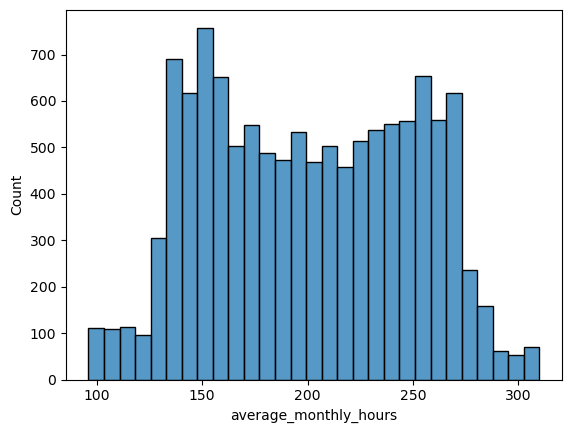

In [104]:
sns.histplot(data=data1,x='average_monthly_hours')

<Axes: xlabel='satisfaction_level', ylabel='Count'>

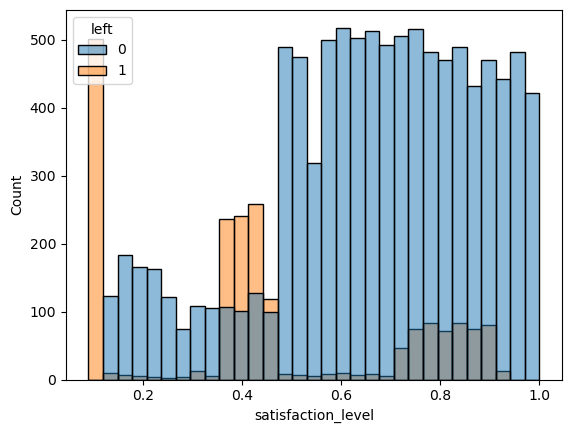

In [105]:
sns.histplot(data=data1,x='satisfaction_level',hue='left')

* When satisfaction_level is really low or around 0.4, people tend to leave.

In [106]:
data1['satisfaction_level'].describe()

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [107]:
data1[data1['satisfaction_level']<0.15]['left'].value_counts()

left
1    511
0    123
Name: count, dtype: int64

In [108]:
data1[((data1['satisfaction_level']<0.45)& (data1['satisfaction_level']>0.35))]['left'].value_counts()

left
1    736
0    336
Name: count, dtype: int64

In [109]:
736/1991

0.36966348568558516

<Axes: xlabel='average_monthly_hours', ylabel='satisfaction_level'>

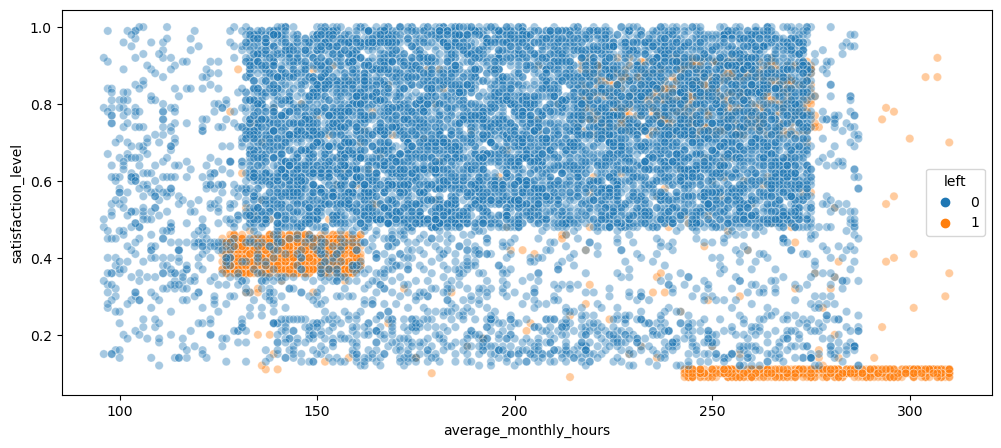

In [110]:
# the relationship between `satisfaction_level` and `average_monthly_hours
plt.figure(figsize=(12,5))
sns.scatterplot(data=data1,x='average_monthly_hours',y='satisfaction_level',hue='left',alpha=0.4)

* From this figure, the employees who left mostly with averge monthly hour around 150 and satisfaction_level about 0.4 or the averge monthly hour higher than 250 with low satisfaction level.

<Axes: xlabel='last_evaluation', ylabel='Count'>

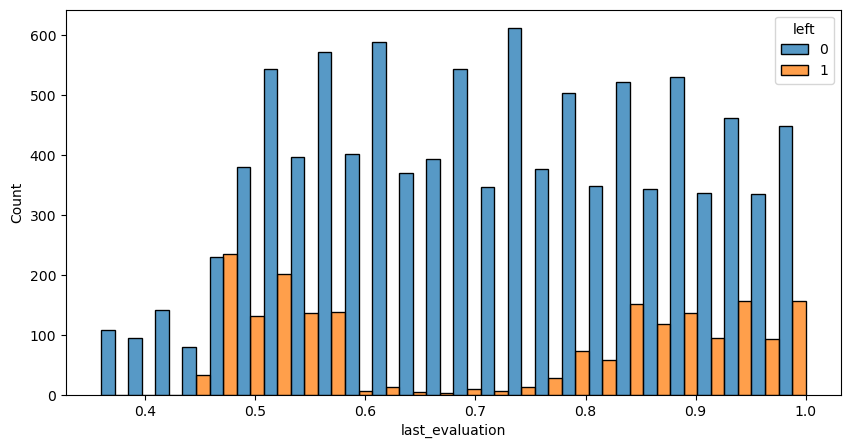

In [111]:
# explore the connection of `last_evaluation` with `left`
plt.figure(figsize=(10,5))
sns.histplot(data=data1,x='last_evaluation',hue='left',multiple='dodge')

* The employees who left mostly with last_evaluation score around 0.5 or above 0.8.

In [112]:
data1.groupby('salary')['left'].value_counts()

salary  left
high    0        942
        1         48
low     0       4566
        1       1174
medium  0       4492
        1        769
Name: count, dtype: int64

In [113]:
1174/1991

0.5896534404821697

In [114]:
769/1991

0.38623807132094423

* Majority employees who left are with low or median salary.

In [115]:
# The relationship between `promotion_last_5years` and `left`
data1['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [116]:
data1.groupby('promotion_last_5years')['left'].value_counts()

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: count, dtype: int64

In [117]:
1983/1991

0.9959819186338523

* 1983  employees who left without any promotion the last 5 years, which is about 99.6% of  all the employees who left.

In [118]:
# the relationship between department and `left`.
data1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [119]:
data1.groupby('department')['left'].value_counts()

department   left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of number of employees left vs. department')

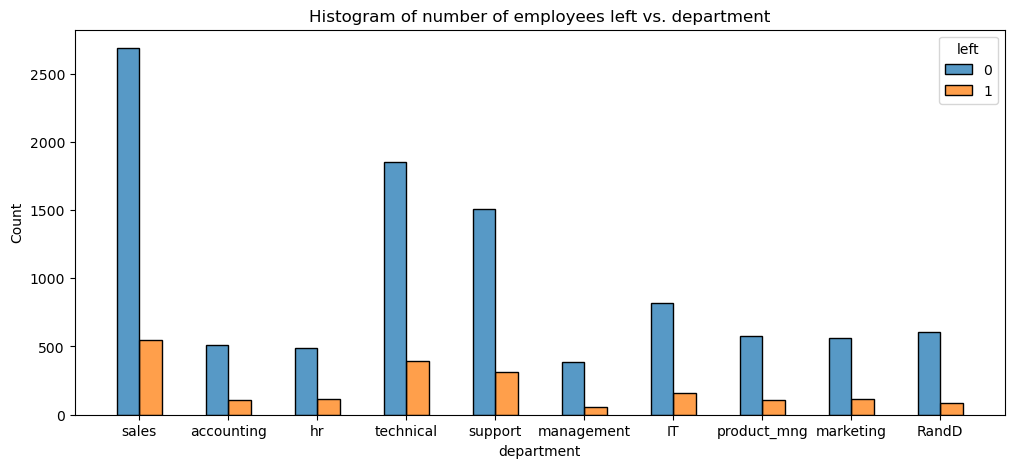

In [120]:
plt.figure(figsize=(12,5))
sns.histplot(data=data1,x='department',hue='left',multiple='dodge',discrete=1,shrink=0.5)
plt.title('Histogram of number of employees left vs. department')

* There is no obvious tendency about which department left more people.

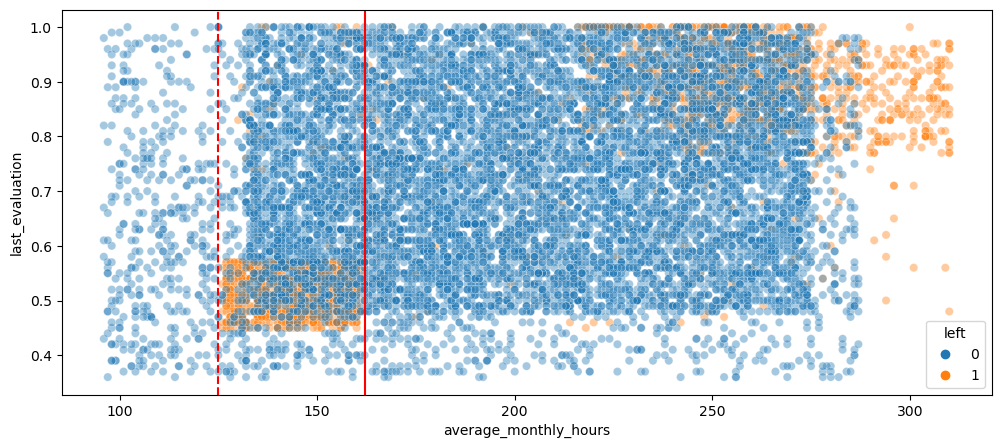

In [121]:
# the relationship between `last_evaluation` and `average_monthly_hours
plt.figure(figsize=(12,5))
sns.scatterplot(data=data1,x='average_monthly_hours',y='last_evaluation',hue='left',alpha=0.4)
plt.axvline(162,color='red')
plt.axvline(125,color='red',linestyle='--')

The graph indicates that there are two group of employees left, those who worked between 125 hour and 162 hour monthy with low evaluation scores or those who overworked with high evaluation score.
Most employees work more than 160 hours a week.There seems to be certain correlation between average monthly work hours and evaluation score. However, it doesn't mean the more hours worked, the higher evaluation score is. Even some of  those who work around 100 hours a month had high evaluation scores.

In [122]:
# The relationship between tenure and left
data1['tenure'].value_counts()

tenure
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [123]:
data1.groupby('tenure')['left'].value_counts()

tenure  left
2       0       2879
        1         31
3       0       4316
        1        874
4       0       1510
        1        495
5       0        580
        1        482
6       0        433
        1        109
7       0         94
8       0         81
10      0        107
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of number of employees left vs. tenure')

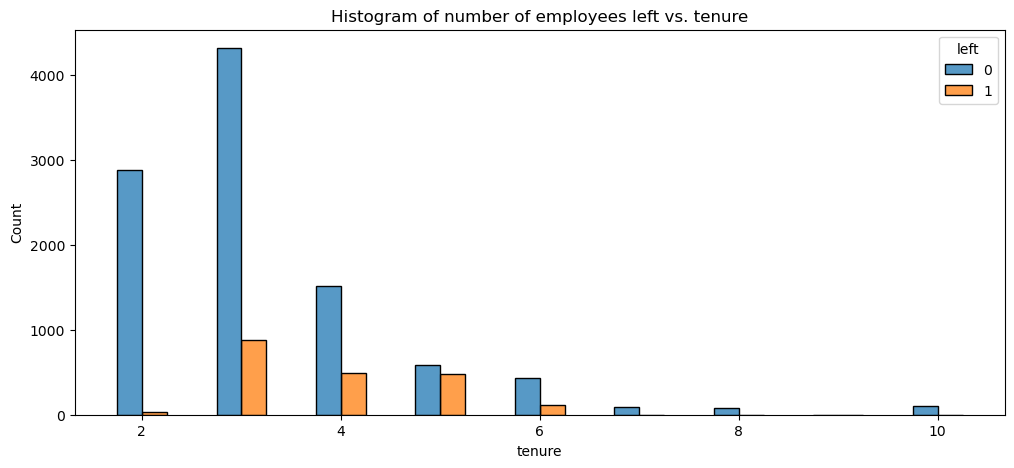

In [124]:
plt.figure(figsize=(12,5))
sns.histplot(data=data1,x='tenure',hue='left',multiple='dodge',discrete=1,shrink=0.5)
plt.title('Histogram of number of employees left vs. tenure')

In [125]:
# relationship between work_accident and left
data1['work_accident'].value_counts()

work_accident
0    10141
1     1850
Name: count, dtype: int64

In [126]:
data1.groupby('work_accident')['left'].value_counts()

work_accident  left
0              0       8255
               1       1886
1              0       1745
               1        105
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram of number of employees left vs. work_accident')

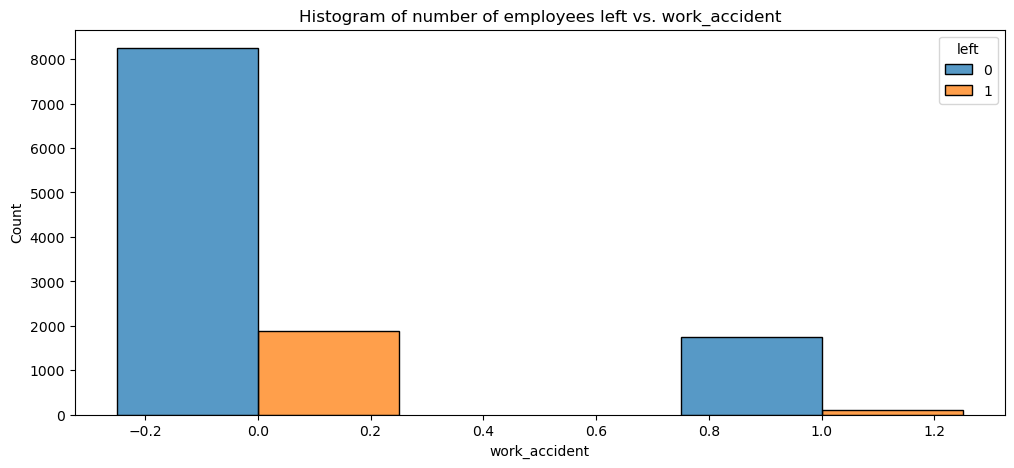

In [127]:
plt.figure(figsize=(12,5))
sns.histplot(data=data1,x='work_accident',hue='left',multiple='dodge',discrete=1,shrink=0.5)
plt.title('Histogram of number of employees left vs. work_accident')

* There doesn't seem to have a connection between `work_accident` and `left`.

<Axes: xlabel='average_monthly_hours', ylabel='promotion_last_5years'>

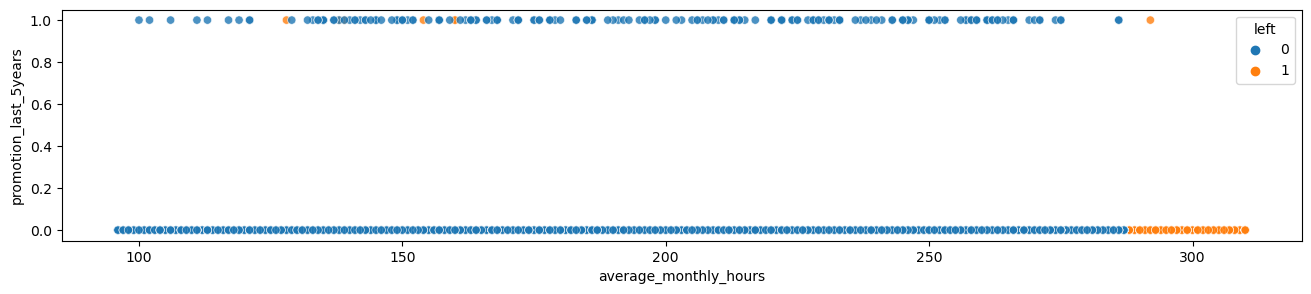

In [128]:
# relationship between `average_monthly_hours` and 'promotion_last_5years'
plt.figure(figsize=(16,3))
sns.scatterplot(data=data1,x='average_monthly_hours',y='promotion_last_5years',hue='left',alpha=0.8)

In [129]:
data_new=data1.drop(['department','salary'],axis=1)

In [130]:
data_new.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


* There are some positive or negative correlation between variables, but not statistically significant.
* It seems like employees who left due to long work time, more projects,low satisfaction level or low evaluation score. 
* Employees who worked more than 6 years did not leave the company.

## Set up statistic model 

- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Logistic Regression Model

In [132]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [133]:
mapping_dict={'low':0,
          'medium':1,
          'high':2}
data1 = data1.copy()  # Ensure data1 is a separate copy if it's a slice
data1['salary_numeric'] = data1['salary'].map(mapping_dict)
data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,salary_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [134]:
data1['salary_numeric'].value_counts()

salary_numeric
0    5740
1    5261
2     990
Name: count, dtype: int64

In [135]:
data1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'salary_numeric'],
      dtype='object')

In [136]:
data1=data1.drop(columns='salary')

In [137]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [138]:
# set up logistic regrresion test model
y=data1[['left']]
X=data1.drop(columns=['left','department'])

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [140]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_numeric
984,0.75,0.86,5,260,5,0,0,0
610,0.09,0.95,7,256,4,0,0,1
7033,0.68,0.61,3,134,4,0,0,1
6411,0.59,0.75,4,190,2,0,0,1
8388,0.59,0.79,3,217,4,0,0,1


In [141]:
y_train = y_train.to_numpy().reshape(-1)

In [142]:
# Construct a logistic model and fit it to the training dataset.
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
log_clf

LogisticRegression(max_iter=500, random_state=42)

In [143]:
# Test the logistic regression model to get predictions on the test set 
y_pred=log_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
# Create a confusion matrix to visualize the results of the logistic regression model 

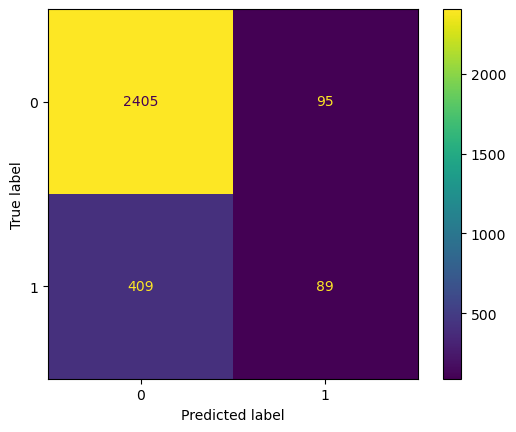

In [145]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quandrant displays the number of true negatives, which means the number of people whom the model predicts will leave is actually left.
The upper-right quandrant displays false positive, which means the number of people whom the model predicts won't leave is actually left.
The bottom-left quandrant is false negative, which which means the number of people whom the model predicts will not leave is actually left.
The bottom_right quandrant is true positive, which means the number of people whom the model predicts will not leave is not left.

In [146]:
# 1st, check the balance in the data.
data1['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

There is an approxiately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. Hence, we don't need to resample. We just use this data without modifying the class balance and continue evaluating the model.

In [147]:
# Create classification report for logistic regression model
target_names=['Predicted would not leave','predict would leave']
print(classification_report(y_test,y_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.96      0.91      2500
      predict would leave       0.48      0.18      0.26       498

                 accuracy                           0.83      2998
                macro avg       0.67      0.57      0.58      2998
             weighted avg       0.79      0.83      0.80      2998



The average precision is 79%, average recall score is 83%, average f1-score is 80% and accuracy is 83%.  However, if it's most important to predict employees who leave, then the scores are significantly lower.

##  Business insights

* It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, number of projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

## Recommendations

* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 